# **1. IMPORT LIBRARY**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.feature_selection import SequentialFeatureSelector
import matplotlib.pyplot as plt
import joblib


# **2**. **DATA** **COLLECTION**

In [ ]:
import requests

# URL tempat dataset disimpan
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00529/diabetes_data_upload.csv"

# Fungsi untuk mengunduh dataset dari URL
def download_dataset(url):
    response = requests.get(url)
    if response.status_code == 200:
        return response.content
    else:
        print("Gagal mengunduh dataset.")
        return None

# Fungsi untuk menyimpan dataset menjadi file CSV
def save_dataset(content, filename):
    with open(filename, 'wb') as f:
        f.write(content)
    print(f"Dataset berhasil disimpan sebagai {filename}.")

# Main function
def main():
    # Mendownload dataset
    dataset_content = download_dataset(url)

    if dataset_content:
        # Menyimpan dataset menjadi file CSV
        save_dataset(dataset_content, "diabetes.csv")

        # Memuat dataset ke dalam DataFrame
        dataset = pd.read_csv("diabetes.csv")
        print("Dataset berhasil dimuat ke dalam DataFrame.")
    else:
        print("Tidak dapat melanjutkan proses karena dataset tidak tersedia.")

if __name__ == "__main__":
    main()

Dataset berhasil disimpan sebagai diabetes.csv.
Dataset berhasil dimuat ke dalam DataFrame.


# **3. DATA PREPARATION**

In [ ]:
# Memuat dataset dari file CSV
dataset = pd.read_csv("diabetes.csv")

# Mengubah nilai string menjadi numerik
dataset.replace({'Male': 1, 'Female': 0, 'Yes': 1, 'No': 0, 'Positive': 1, 'Negative': 0}, inplace=True)

# Memisahkan atribut dan label
X = dataset.drop(columns=['class'])
y = dataset['class']

In [ ]:
dataset.head(50)

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
0,40,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1,1
1,58,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,1
2,41,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,1
3,45,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0,1
4,60,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1
5,55,1,1,1,0,1,1,0,1,1,0,1,0,1,1,1,1
6,57,1,1,1,0,1,1,1,0,0,0,1,1,0,0,0,1
7,66,1,1,1,1,1,0,0,1,1,1,0,1,1,0,0,1
8,67,1,1,1,0,1,1,1,0,1,1,0,1,1,0,1,1
9,70,1,0,1,1,1,1,0,1,1,1,0,0,0,1,0,1


In [ ]:
print(dataset.dtypes)

Age                   int64
Gender                int64
Polyuria              int64
Polydipsia            int64
sudden weight loss    int64
weakness              int64
Polyphagia            int64
Genital thrush        int64
visual blurring       int64
Itching               int64
Irritability          int64
delayed healing       int64
partial paresis       int64
muscle stiffness      int64
Alopecia              int64
Obesity               int64
class                 int64
dtype: object


In [ ]:
dataset.isnull().sum()

Age                   0
Gender                0
Polyuria              0
Polydipsia            0
sudden weight loss    0
weakness              0
Polyphagia            0
Genital thrush        0
visual blurring       0
Itching               0
Irritability          0
delayed healing       0
partial paresis       0
muscle stiffness      0
Alopecia              0
Obesity               0
class                 0
dtype: int64

In [ ]:
dataset.shape

(520, 17)

In [ ]:
# Memisahkan dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Informasi tentang data yang displitting:")
print("-----------------------------------------------------")

# Jumlah data total sebelum pemisahan
total_data = len(X)
print("Jumlah total data:", total_data)

# Jumlah data latih dan data uji setelah pemisahan
total_train_data = len(X_train)
total_test_data = len(X_test)
print("Jumlah data train:", total_train_data)
print("Jumlah data test:", total_test_data)

# Persentase pembagian data latih dan data uji
percent_train = (total_train_data / total_data) * 100
percent_test = (total_test_data / total_data) * 100
print("Persentase data train:", percent_train, "%")
print("Persentase data test:", percent_test, "%")

# Jumlah fitur dan label
num_features = X.shape[1]
num_labels = len(y.unique())
print("Jumlah fitur:", num_features)
print("Jumlah label:", num_labels)

Informasi tentang data yang displitting:
-----------------------------------------------------
Jumlah total data: 520
Jumlah data train: 416
Jumlah data test: 104
Persentase data train: 80.0 %
Persentase data test: 20.0 %
Jumlah fitur: 16
Jumlah label: 2


# **4. DATA TRANSFORMATION**

In [ ]:

# Menambahkan kolom untuk hasil prediksi kelas
data_uji['Predicted Class'] = y_pred

# Menampilkan DataFrame sebagai tabel
print(data_uji)

          Age    Gender  Polyuria  Polydipsia  sudden weight loss  weakness  \
0    1.974596  0.765092  1.007722   -0.901025           -0.846269 -1.191052   
1   -0.661367 -1.307032  1.007722    1.109847           -0.846269  0.839594   
2    0.738988  0.765092  1.007722    1.109847           -0.846269  0.839594   
3   -0.578993  0.765092  1.007722    1.109847            1.181657  0.839594   
4   -0.249498 -1.307032 -0.992337   -0.901025           -0.846269 -1.191052   
..        ...       ...       ...         ...                 ...       ...   
99   0.162372 -1.307032  1.007722    1.109847            1.181657  0.839594   
100 -1.237984 -1.307032 -0.992337   -0.901025           -0.846269 -1.191052   
101  1.480353  0.765092  1.007722    1.109847           -0.846269  0.839594   
102 -0.167124  0.765092 -0.992337   -0.901025           -0.846269  0.839594   
103 -1.485105  0.765092 -0.992337   -0.901025            1.181657  0.839594   

     Polyphagia  Genital thrush  visual blurring   

In [ ]:
import tensorflow as tf
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Normalisasi fitur-fitur
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Membuat model dengan TensorFlow
model = tf.keras.Sequential([
    tf.keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Kompilasi model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Melakukan prediksi probabilitas untuk setiap sampel dalam dataset uji
y_pred_proba = model.predict(X_test)

# Mengkonversi probabilitas menjadi kelas prediksi
y_pred = [1 if proba >= 0.5 else 0 for proba in y_pred_proba]

# Menampilkan hasil prediksi kelas untuk setiap sampel dalam dataset uji
for i, pred in enumerate(y_pred):
    print(f"Predicted class for sample {i}: {pred}")

4/4 [==============================] - 0s 6ms/step
Predicted class for sample 0: 1
Predicted class for sample 1: 0
Predicted class for sample 2: 0
Predicted class for sample 3: 1
Predicted class for sample 4: 0
Predicted class for sample 5: 1
Predicted class for sample 6: 0
Predicted class for sample 7: 1
Predicted class for sample 8: 1
Predicted class for sample 9: 1
Predicted class for sample 10: 1
Predicted class for sample 11: 0
Predicted class for sample 12: 1
Predicted class for sample 13: 1
Predicted class for sample 14: 0
Predicted class for sample 15: 1
Predicted class for sample 16: 1
Predicted class for sample 17: 1
Predicted class for sample 18: 1
Predicted class for sample 19: 1
Predicted class for sample 20: 1
Predicted class for sample 21: 0
Predicted class for sample 22: 0
Predicted class for sample 23: 1
Predicted class for sample 24: 1
Predicted class for sample 25: 1
Predicted class for sample 26: 1
Predicted class for sample 27: 1
Predicted class for sample 28: 1
Pr

In [ ]:
# Menampilkan summary model
model.summary()

# Melatih model dengan data latih
history = model.fit(X_train, y_train, epochs=25, batch_size=32, verbose=1)

# Evaluasi model dengan data uji
test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
print('Test accuracy:', test_acc)


Model: "sequential_35"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_89 (Dense)            (None, 64)                1088      
                                                                 
 dense_90 (Dense)            (None, 32)                2080      
                                                                 
 dense_91 (Dense)            (None, 1)                 33        
                                                                 
Total params: 3201 (12.50 KB)
Trainable params: 3201 (12.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
Epoch 1/25
13/13 [==============================] - 1s 4ms/step - loss: 0.6851 - accuracy: 0.5120
Epoch 2/25
13/13 [==============================] - 0s 2ms/step - loss: 0.5452 - accuracy: 0.7716
Epoch 3/25
13/13 [==============================] - 0s 3ms/step - loss: 0.4492 - accura

# **5. DATA PROCESSING**

In [ ]:
# Inisialisasi model Naïve Bayes
nb_model = GaussianNB()

# Melatih model Naïve Bayes
nb_model.fit(X_train, y_train)

# Memprediksi label untuk data uji
y_pred = nb_model.predict(X_test)

# Menghitung akurasi
accuracy = accuracy_score(y_test, y_pred)

# Menghitung presisi
precision = precision_score(y_test, y_pred)

# Menghitung recall
recall = recall_score(y_test, y_pred)

# Evaluasi model
conf_matrix = confusion_matrix(y_test, y_pred)

print("Akurasi model Naïve Bayes:", accuracy)
print("Presisi model Naïve Bayes:", precision)
print("Recall model Naïve Bayes:", recall)
print("Confusion Matrix:\n", conf_matrix)

Akurasi model Naïve Bayes: 0.9134615384615384
Presisi model Naïve Bayes: 0.9305555555555556
Recall model Naïve Bayes: 0.9436619718309859
Confusion Matrix:
 [[28  5]
 [ 4 67]]


In [ ]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

# Inisialisasi model
model = Sequential([
    Dense(10, input_shape=(16,), activation='relu'),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Split dataset menjadi data latih dan data validasi
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train model dengan data latih dan data validasi
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_val, y_val), verbose=0)

# **6. DATA VISUALIZATION**

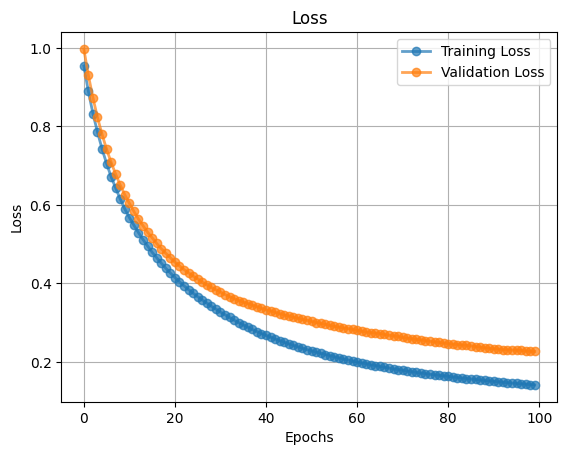

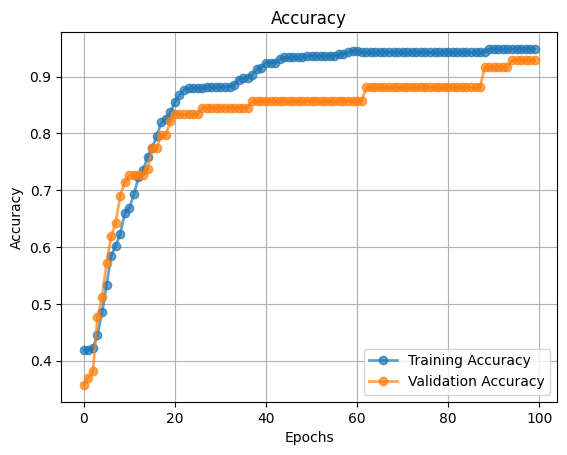

In [ ]:
# Plot loss
plt.plot(history.history['loss'], label='Training Loss', linewidth=2, alpha=0.7, marker='o')
plt.plot(history.history['val_loss'], label='Validation Loss', linewidth=2, alpha=0.7, marker='o')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

# Plot accuracy
plt.plot(history.history['accuracy'], label='Training Accuracy', linewidth=2, alpha=0.7, marker='o')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linewidth=2, alpha=0.7, marker='o')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

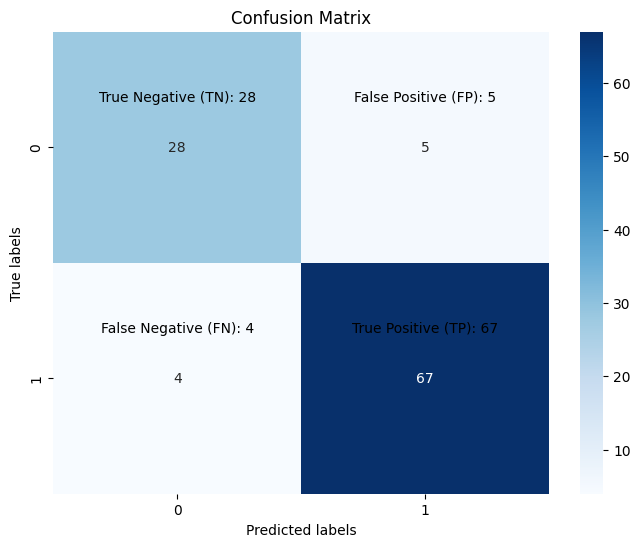

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualisasi confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')

plt.text(1.5, 1.3, "True Positive (TP): " + str(conf_matrix[1][1]), horizontalalignment='center')
plt.text(1.5, 0.3, "False Positive (FP): " + str(conf_matrix[0][1]), horizontalalignment='center')
plt.text(0.5, 1.3, "False Negative (FN): " + str(conf_matrix[1][0]), horizontalalignment='center')
plt.text(0.5, 0.3, "True Negative (TN): " + str(conf_matrix[0][0]), horizontalalignment='center')

plt.show()

# **7. DATA STORAGE**

In [ ]:
import joblib

# Simpan model yang telah dilatih
joblib.dump(nb_model, 'diabetes_prediction_model.pkl')
print("Model berhasil disimpan sebagai 'diabetes_prediction_model.pkl'.")

Model berhasil disimpan sebagai 'diabetes_prediction_model.pkl'.
